# Take-home exam 2d-visualization MVE080/MMG640

This notebook contains the questions for the take-home exam in the course Scientific visualization Autumn MVE080/MMG640. Provide the answers in the notebook and then upload the notebook as a html on Canvas.

**Important** - make sure to hand in the exam in time. You will have 24 hours (00:00-23:59) on 14-12-2022 to complete the exam. Late hands in will not be accepted. 

**Important** - you are not allowed to collaborate or do plagiarism by using available text/code on the internet. In case we detect plagiarism you will receive a failing grade.

**Important** - make sure that you complete and provide an answer to all the questions on the exam. In every code cell and cell on the format; *Provide answer here*, you should provide an answer. 

## Grading criteria

The grade on this take-home exam is either pass or fail. When correcting the exam I will look for the following things:

1. That the produced visual is readable. 
2. That given the task the visual effectively communicates the intended main message. 
3. That any potential motivations to why a visual is readable or not is correct. 
4. That appropriate colors have been used.

## Other information

You are allowed to use either R or Python to answer the questions below (both have notebook support). You are further allowed to use any plotting library you want. The code-snippet below loads the packages we primarily have used throughout the course.


In [1]:
# To load required packages 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from plotnine import *

# A nice color palette for categorical data 
cbPalette = ["#E69F00", "#56B4E9", "#009E73", 
             "#F0E442", "#0072B2", "#D55E00", 
             "#CC79A7", "#999999"]

## Question 1 

During the course we have talked about colormaps for categorical and quantitative data. One type of colormap we have discussed is the divergent colormap. Below answer the following **three** questions:

1. Explain when it is suitable to use a divergent colormap.
2. Create a visual below where it is suitable to use a divergent colormap. You are allowed to reuse any visual you have created in the homework, or to create a new visual using any of the datasets available on Canvas. **You are not allowed to use any of the visuals from the lecture slides**. 
3. Motivate which message a divergent colormap helps to highlight in the created visual.


A diverging scale is useful when the data has some neutral midpoint that we want to highlight. This can be with for with example positive and negative numbers, which we might want to visualize with different colors to make it obvious if a value is positive or negative, and how far from zero it is. 

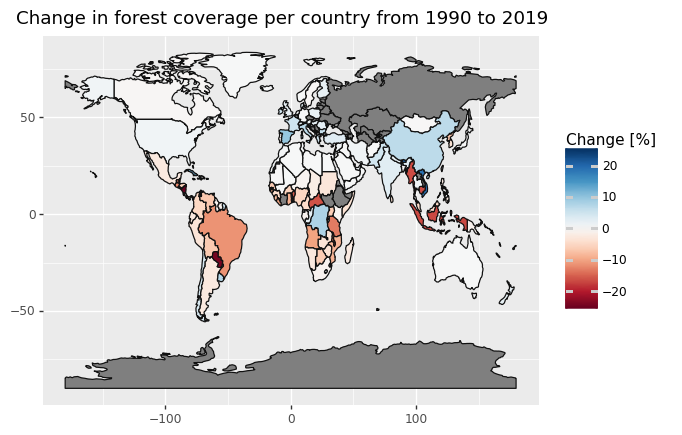

<ggplot: (144607681148)>

In [293]:
# Insert code for the visual here
# Do not forget to print the visual 

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

f90 = pd.read_csv('Forest_1990.csv')
f19 = pd.read_csv('Forest_2019.csv')


world = world.merge(f90, left_on='name', right_on='Country', how='outer')
world = world.merge(f19, left_on='name', right_on='Country', how='outer')
world['diff'] = world['2019_forest'] - world['1990_forest']
abmax = np.max(np.abs(world['diff']))

p = (ggplot(world)
    + geom_map(aes(fill='diff'))
    + scale_fill_cmap('RdBu', limits=[-abmax, abmax])
    + labs(title='Change in forest coverage per country from 1990 to 2019', fill='Change [%]')
)
p

In the visual above, a diverging color scale is used to highlight the increase or decrease in forest coverage for per country over a certain period. The diverging scale immediately makes it obvious which countries have had a positive change and vice versa, and it is quite easy to spot which countries have had more drastical change from the intensity of the color.

## Question 2

Below, a made-up example on proportion data showing book genre people prefer for the years 1990, 2000, and 2010 is given. Data are plotted as pie-charts. Answer the following **two** questions: 

1. Motivate why a pie-chart is ill-suited if we want to see how the proportion that prefer a certain genre, e.g. horror, has changed over time.
2. Create a visual from where it is easy to see how the proportion that prefer a certain genre has changed over the years. When creating the new visual, use appropriate colors. 

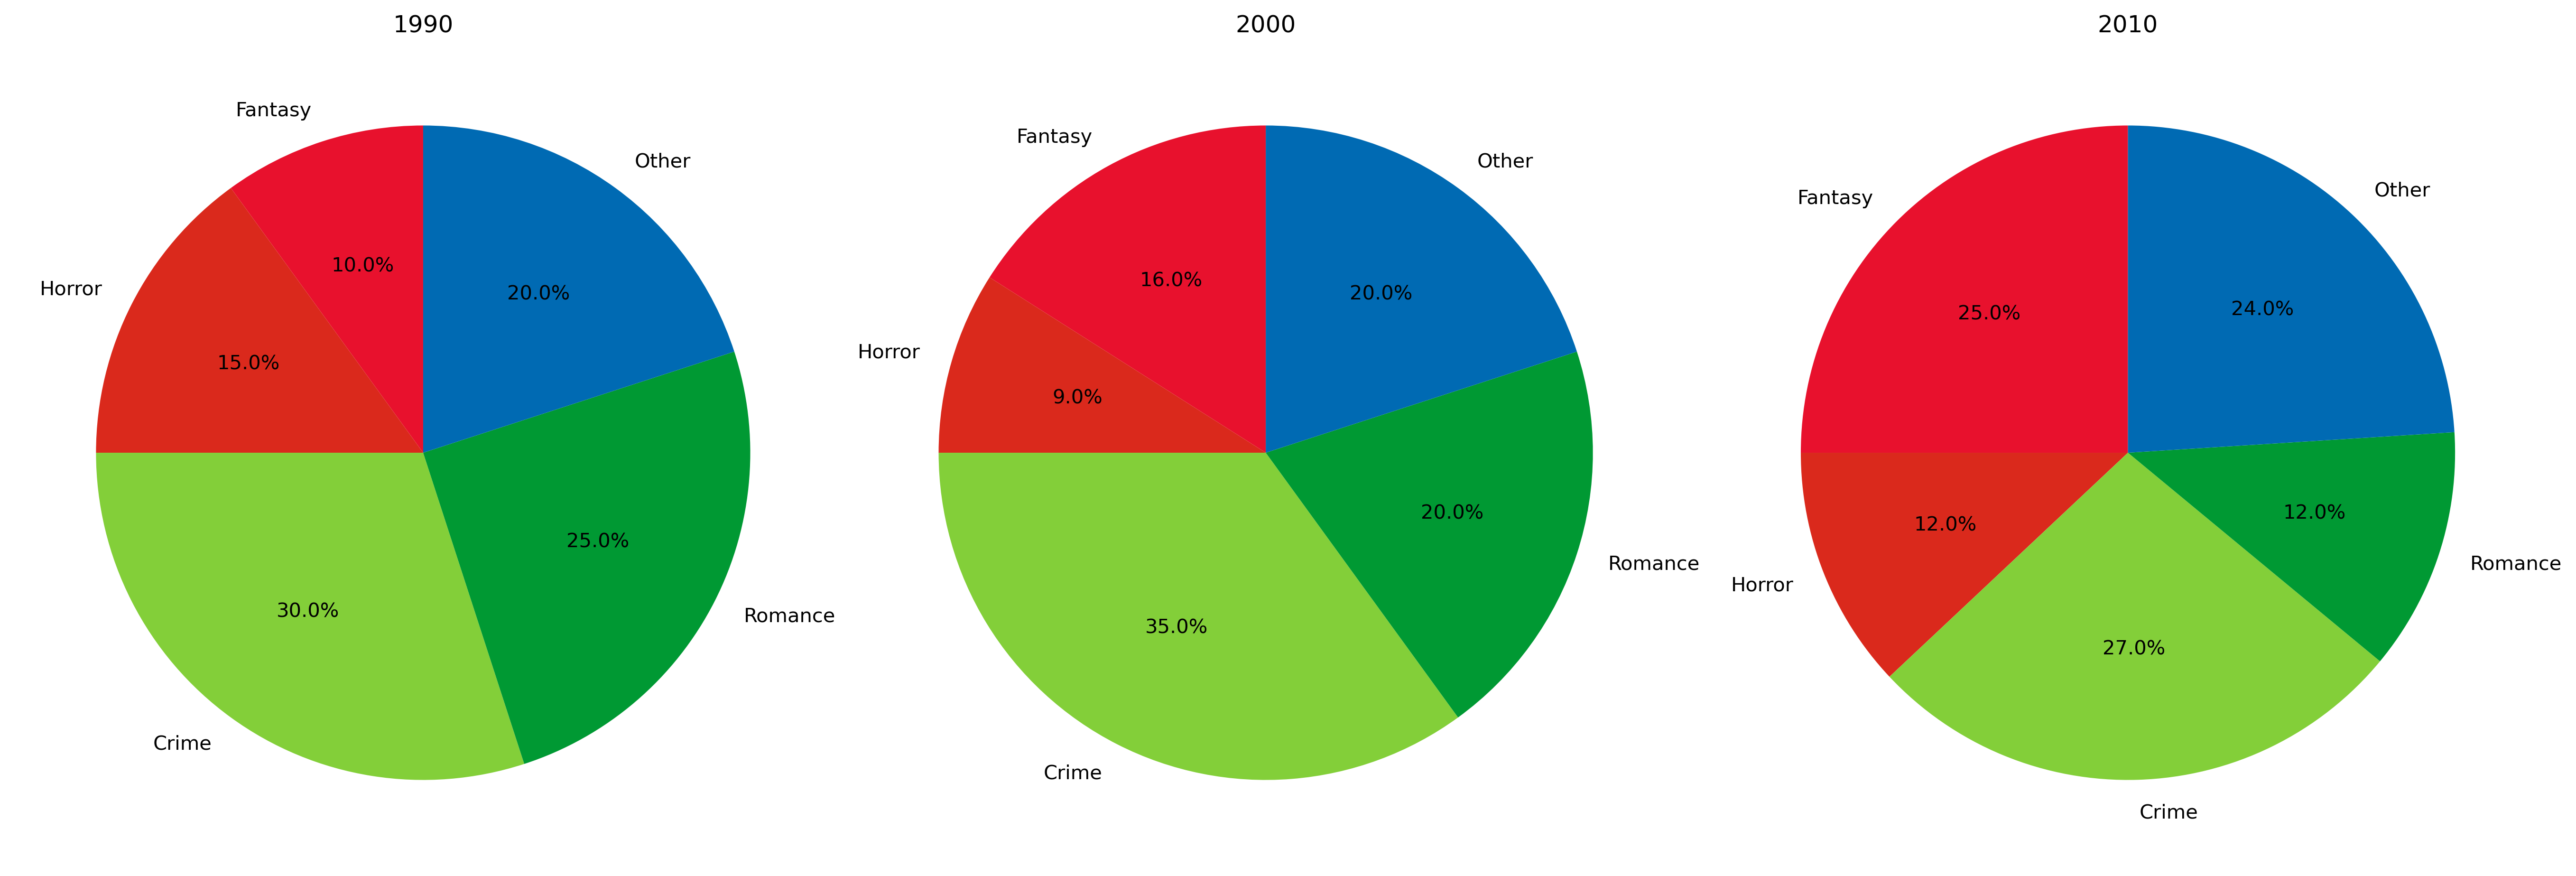

In [13]:
data_1990 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [10, 15, 30, 25, 20],
                          "Year" : [1990, 1990, 1990, 1990, 1990], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})
data_2000 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [16, 9, 35, 20, 20],
                          "Year" : [2000, 2000, 2000, 2000, 2000], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})                                 
data_2010 = pd.DataFrame({"Genre" : ["Fantasy", "Horror", "Crime", "Romance", "Other"],
                          "Proportion" : [25, 12, 27, 12, 24],
                          "Year" : [2010, 2010, 2010, 2010, 2010], 
                          "Color" : ["#E8112d", "#DA291C", "#83CF39", "#009933", "#006AB3"]})                                                    



fig, axs = plt.subplots(1, 3, constrained_layout=True, dpi=300, figsize=(18, 10))

axs[0].pie(data_1990["Proportion"], 
        labels=data_1990["Genre"], 
        colors = data_1990["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[0].set_title("1990")

axs[1].pie(data_2000["Proportion"], 
        labels=data_2000["Genre"], 
        colors = data_2000["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[1].set_title("2000")

axs[2].pie(data_2010["Proportion"], 
        labels=data_2010["Genre"], 
        colors = data_2010["Color"], 
        autopct='%1.1f%%',
        startangle=90.0)
axs[2].set_title("2010")

plt.show()


Apart from the largest, most obvious trends it is hard to see what is going in over the years. One may see that romance has been falling and that fantasy has been gaining share, but even that is completely obvious at first glance. What is going on with the other genres is even harder to tell from this visualization, especially for smaller genres such as horror which are basically tossed around to quite different positions and sizes in the pie from year to year, making it difficult to see how that proportion changes over time. 

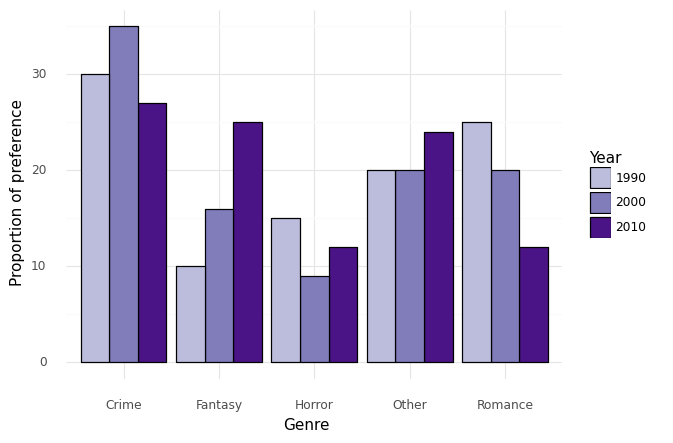

<ggplot: (144608001003)>

In [56]:
# Insert code for the visual here
# Do not forget to print the visual 

genres = pd.concat([data_1990, data_2000, data_2010])
genres = genres.assign(Year = pd.Categorical(genres['Year'],
                        categories=[1990, 2000, 2010]))

col_use = ["#bcbddc", "#807dba", "#4a1486"]

p = (
    ggplot(genres, aes(x='Genre', y='Proportion', group='factor(Year)', fill='Year'))
    + geom_bar(stat='identity', position='dodge', color='black')
    + scale_fill_manual(values=col_use)
    + theme_minimal()
    + labs(x='Genre', y='Proportion of preference')
    + theme(
        # legend_position='none'
    )
)
p

## Question 3

On Canvas two different ways to plot the uncertainty for a curve fit are given. Which visual would you use for a lay audience (that is an audience not trained in statistics). Motivate!


A confidence band for a curve fit can be quite misleading if you dont know what it means, so I would use example 2. To the untrained eye, example 1 could be interpreted that the uncertainty is related to points sampled from the distribution, which is not the case. The uncertainty of the fit is in the curve itself which is a lot easier to grasp from example 2.

With more complex non-linear fits it could also be interpreted that that the uncertainty is just related to the "height" of the curve and slight deformations. The confidence band represent lots of curves that can be quite a bit "curvier", or less smooth than the best fit curve. This may not be clear to a lay audience.

## Question 4

On Canvas you have a heatmap showing forest coverage for various countries from 1970 to 2019. Answer the following **two** questions:

1. Using the dataset on Canvas recreate the visual, but, with a better suited colormap
2.  Motivate why your new colormap is an appropriate choice for this visual.

**Note**. When recreating the visual you do not need to have the countries in the same order on the y-axis as I do.


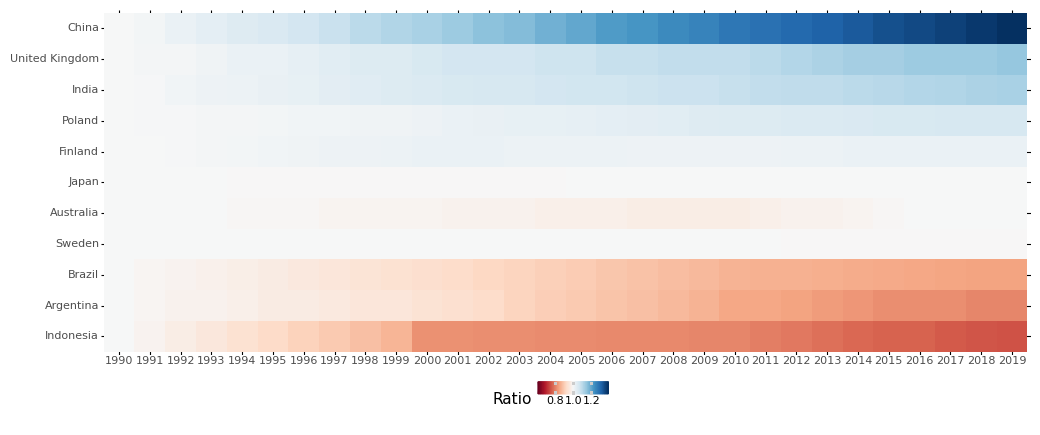

<ggplot: (144616421452)>

In [299]:
# Insert code for the visual here
# Do not forget to print the visual 

forest = pd.read_csv('Forest_tidy-1.csv')
# test = forest[forest['Year'] == 2019].sort_values('ratio')
# print(test)
forest = forest.assign(country = pd.Categorical(forest['country'],
                        categories=forest[forest['Year'] == 2019].sort_values('ratio')['country']))
dif = np.max(np.abs(forest['ratio'])-1)

min_r = 1-dif
max_r = 1+dif
p = (
    ggplot(forest, aes(x='factor(Year)', y='country', fill='ratio'))
    + geom_tile()
    + scale_fill_cmap('RdBu', labels=[0.8, 1.0, 1.2], breaks=[0.8, 1.0, 1.2], limits=[min_r, max_r], guide=guide_colorbar(title='Ratio', title_position='left', barwidth=6, barheight=7, nbin=100))
    + coord_equal()
    + theme_minimal()
    + theme(
        legend_position='bottom',
        axis_title=element_blank(),
        panel_grid=element_line(color='black'),
        legend_title_align='center',
        figure_size=(12,6),
        axis_text=element_text(size=8),
        axis_text_y=element_text(margin={'r':-11}),
        axis_text_x=element_text(margin={'t':-11}),
        legend_text_colorbar=element_text(size=8, ha='center')
    )
)
p

The data tells us that some countries have increased their forest coverage, and some have decreased. As explained in question 1, this is a good use case for a diverging color map. With this colormap we can clearly see which countries have been relatively stable, increased, or decreased, and the color intensity gives a good indication of how much they changed. The intensity is quite comparable between the two colors, and because of this we can see that the increase in forest coverage in China is more than the decrease in Indonesia for example.

## Question 5

On Canvas there is a made-up dataset with temperature data for each day of the year. Using this dataset answer the following **two** questions: 
1. Visualize the data such that we can clearly see the median temperature and temperature distribution for each month. 
2. Comment on any particular features of the temperature distribution for September.

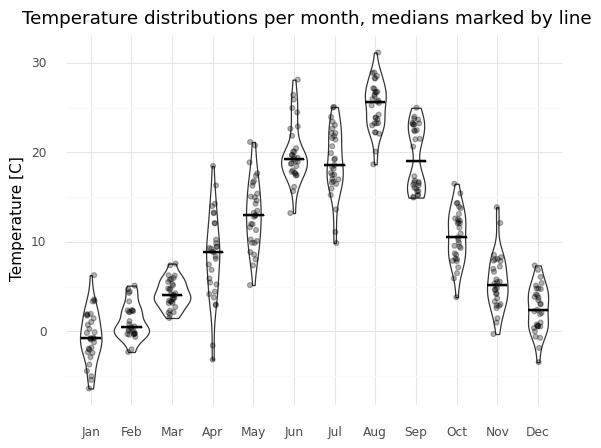

<ggplot: (144607507387)>

In [300]:
# Insert code for the visual here
# Do not forget to print the visual 

temps = pd.read_csv('Temperature.csv')
temps['legend'] = 'no'
medians = pd.DataFrame(columns=['month', 'temp'])
for i, month in enumerate(temps['month'].unique()):
    new_row = pd.DataFrame({'month':[month], 'temp':[temps[temps['month']==month]['temp'].median()], 'legend':'yes'})
    medians = pd.concat([medians, new_row])


p = (
    ggplot(temps, aes(x='month', y='temp'))
    + geom_violin()
    + geom_jitter(width=0.1, alpha=0.3)
    + geom_crossbar(data=medians, mapping=aes(ymin='temp', ymax='temp'))
    # + scale_color_manual(values=['black'])
    + scale_x_discrete(limits=temps["month"].unique())
    + labs(title='Temperature distributions per month, medians marked by line', y='Temperature [C]')
    + theme_minimal()
    + theme(
        axis_title_x=element_blank()
    )
)
p

In september the temperatures seem to be clustered in two distinct groups, around 16 degrees and 22 respectively. This results quite a special shape for the visualization which would be hard to find with a box-plot for example. Also, since the number of temperature samples in september is even and there are equally many samples in the larger and smaller clusters, the median ends up between the groups even though there are no data points there.

## Question 6

A colleague of mine suggested that apartment prices in Sweden increase with population size. Using the dataset on Canvas create a visual which clearly shows the relationship between apartment prices and Sweden's population over time.

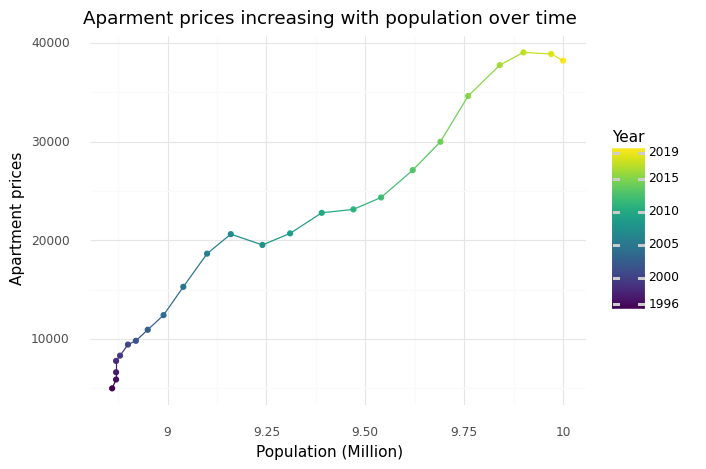

<ggplot: (144615082108)>

In [262]:
# Insert code for the visual here
# Do not forget to print the visual 

pop_price = pd.read_csv('Pop_house_price.csv')
pop_price['Population'] /= 1e6

p = (
    ggplot(pop_price, aes(x='Population', y='price', color='Year'))
    + geom_point()
    + geom_path()
    + scale_color_cmap(breaks=[1996, 2000, 2005, 2010, 2015, 2019])
    + theme_minimal()
    + labs(y='Apartment prices', x='Population (Million)', title='Aparment prices increasing with population over time')
)
p

## Question 7

On Canvas, you can find a dataset with inflation adjusted GDP per capita for several countries between 1920 and 2010. Using this dataset answer the following **three** questions: 
1. Select one question you want to investigate with a visual. 
2. Create that visual using data from at least two years and two countries. 
3. Motivate why your choice if visual is suitable to investigate your question. 

I want to see if India or China has had the bigger economic boom in the last 40 years.

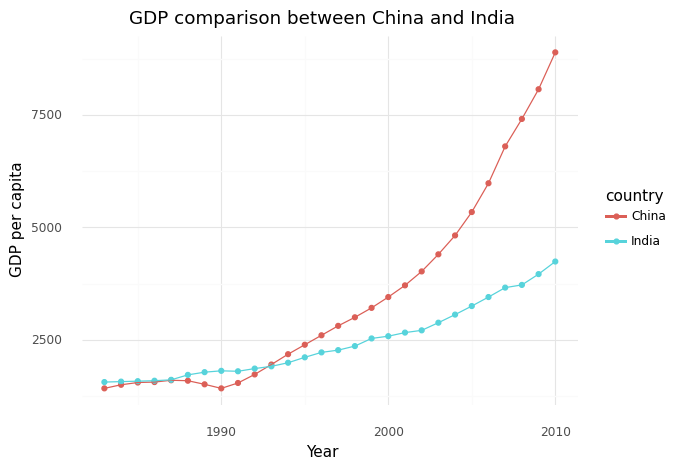

<ggplot: (144607178289)>

In [278]:
# Insert code for the visual here
# Do not forget to print the visual 

gdp = pd.read_csv('Data_gdp_per_capita.csv')

plot_data = gdp.query('country in ["India", "China"] and Year > 1982')

p = (
    ggplot(plot_data, aes(x='Year', y='GDP_per_capita', color='country'))
    + geom_point()
    + geom_line()
    + labs(y='GDP per capita', x='Year', title='GDP comparison between China and India')
    + theme_minimal()
)
p

To investigate whether China or India has had the greatest increase in GDP per capita I visualized the data points for the last 40 years for each country as points connected by lines. This emphasizes that the data is not continuous while clearly displaying the trends. If there would be more countries involved I would probably skip the points to minimize the clutter, but in this case I think the points are worth adding. 

This kind of plot clearly visualizes the trend for each country, and we can make our comparison at a glance. With data points for each year it shows that we have quite a steady trend and it lets us see clearly when any changes happened. For example we see that China started gaining ground quickly in 1990, and accelerated further during the 00's while India has been on a steady but slower increase the entire time.